# Elastic network analysis

Here we use a Gaussian network model to characterise conformational states of a trajectory.

**Last updated:** January 2020

**Minimum version of MDAnalysis:** 0.17.0

**Packages required:**
    
* MDAnalysis [[1, 2]](#References)
* MDAnalysisTests


<div class="alert alert-info">
    
**Note**

The elastic network analysis follows the approach of [(Hall *et al.*, 2007)](#References). Please cite them when using the ``MDAnalysis.analysis.gnm`` module in published work.

</div>

In [95]:
import MDAnalysis as mda
from MDAnalysis.tests.datafiles import *
import matplotlib.pyplot as plt
%matplotlib inline

## Loading files

The test files we will be working with here feature adenylate kinase (AdK), a phosophotransferase enzyme. [[4]](#References)

In [108]:
u1 = mda.Universe(PSF, DCD)
u2 = mda.Universe(PSF, DCD2)

## Using a Gaussian network model

Using a Gaussian network model, we can characterise the concerted motions of a protein, and the dominance of these motions, over a trajectory.

In [109]:
nma1 = gnm.GNMAnalysis(u1,
                      selection='name CA',
                      cutoff=7.0)
nma1.run()

The output is saved in `nma1.results`: the time in picoseconds, the first eigenvalue, and the first eigenvector, associated with each frame.

In [110]:
len(nma1.results)

98

In [111]:
nma2 = gnm.GNMAnalysis(u2,
                      selection='name CA',
                      cutoff=7.0)
nma2.run()

Unlike normal mode analysis, Gaussian network model analysis uses only a single eigenvalue to represent the rotation and translation of each frame. The motion with the lowest positive eigenvalue represents the dominant motion of a structure. The frequency of this motion is the square root of the eigenvalue.

Plotting the probability distribution of the frequency for the first eigenvector can highlight variation in the probability distribution, which can indicate trajectories in different states.

Below, we plot the distribution of eigenvalues. The dominant conformation state is represented by the peak at 0.06.

Text(0, 0.5, 'Frequency')

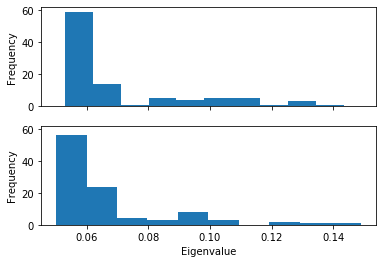

In [117]:
eigenvalues1 = [res[1] for res in nma1.results]
eigenvalues2 = [res[1] for res in nma2.results]

histfig, histax = plt.subplots(nrows=2, sharex=True, sharey=True)
histax[0].hist(eigenvalues1)
histax[1].hist(eigenvalues2)

histax[1].set_xlabel('Eigenvalue')
histax[0].set_ylabel('Frequency')
histax[1].set_ylabel('Frequency')

When we plot how the eigenvalue varies with time, we can see that the simulation transitions into the dominant conformation and stays there in both trajectories.

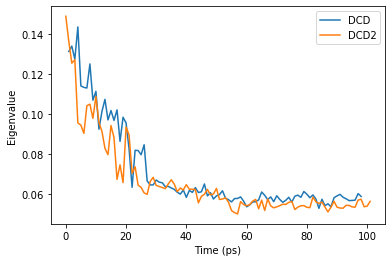

In [121]:
time1 = [res[0] for res in nma1.results]
time2 = [res[0] for res in nma2.results]
linefig, lineax = plt.subplots()
plt.plot(time1, eigenvalues1, label='DCD')
plt.plot(time2, eigenvalues2, label='DCD2')
lineax.set_xlabel('Time (ps)')
lineax.set_ylabel('Eigenvalue')
plt.legend()

DCD and DCD2 appear to be in similar conformation states.

## References

[1] R. J. Gowers, M. Linke, J. Barnoud, T. J. E. Reddy, M. N. Melo, S. L. Seyler, D. L. Dotson, J. Domanski, S. Buchoux, I. M. Kenney, and O. Beckstein. [MDAnalysis: A Python package for the rapid analysis of molecular dynamics simulations](http://conference.scipy.org/proceedings/scipy2016/oliver_beckstein.html). In S. Benthall and S. Rostrup, editors, *Proceedings of the 15th Python in Science Conference*, pages 98-105, Austin, TX, 2016. SciPy, doi: [10.25080/majora-629e541a-00e](https://doi.org/10.25080/majora-629e541a-00e).

[2] N. Michaud-Agrawal, E. J. Denning, T. B. Woolf, and O. Beckstein. MDAnalysis: A Toolkit for the Analysis of Molecular Dynamics Simulations. *J. Comput. Chem*. 32 (2011), 2319-2327, [doi:10.1002/jcc.21787](https://dx.doi.org/10.1002/jcc.21787). PMCID:[PMC3144279](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3144279/)

[3] Benjamin A. Hall, Samantha L. Kaye, Andy Pang, Rafael Perera, and Philip C. Biggin. Characterization of Protein Conformational States by Normal-Mode Frequencies. *JACS* 129 (2007), 11394–11401.

[4] Beckstein O, Denning EJ, Perilla JR, Woolf TB. Zipping and unzipping of adenylate kinase: atomistic insights into the ensemble of open<-->closed transitions. *J Mol Biol*. 2009;394(1):160–176. [doi:10.1016/j.jmb.2009.09.009](https://dx.doi.org/10.1016%2Fj.jmb.2009.09.009)

